In [67]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

In [68]:
#create a matrix of size L*L
def create(L) :
    return [[x_0,x_1] for x_0 in range(2*L) for x_1 in range(2*L)]

In [69]:
#array of all distances between a center and the other points of the matrix
def distance(x_0,matrix,L):
    x = [sites[0] for sites in matrix]
    y = [sites[1] for sites in matrix]
    delta_x = [abs(x_0[0]-i) for i in x]
    delta_y = [abs(x_0[1]-j) for j in y]
    arr_dist = [(delta_x[i]**2 + delta_y[i]**2)**(1/2) for i in range(len(delta_x))]
    return arr_dist

In [70]:
# List of radii
def radii(L, steps):
    radius = np.linspace(0.01,L/2,num=steps)
    return radius

In [71]:
# choose a center randomly in the original matrix
def x_0(L):                                                                               #take a random point from the initial matrix
    x = random.uniform(int(L/2),int(3*L/2))
    y = random.uniform(int(L/2),int(3*L/2))
    center = [x,y]
    return center

In [72]:
def count(x_0,mat,radius): #count how many points are at a distance <= r from x
    L = len(mat)
    dist = distance(x_0,mat,L)
    dist.sort()
    d = np.array(dist)
    counts = []
    for R in radius:
        count_R = np.count_nonzero(d <= R)
        counts.append(count_R)
    return counts

def vec_x0(L,n):
    v = [x_0(L) for i in range(n)]
    return v

def arr_counts(L,n,radius,mat):
    v = vec_x0(L,n)
    arr = [count(x0,mat,radius) for x0 in v]
    return arr

In [73]:
def variance(L,n,radius,mat):
    arr = arr_counts(L,n,radius,mat)
    m = np.matrix(arr)
    mom = np.power(m[:][0],2)
    return np.average(mom)-np.power(np.average(arr),2)

In [74]:
def rescaled_var(L,steps,n,mat):
    R = radii(L,steps)
    arr_var = [(variance(L,n,r,mat)/pow(r,2)) for r in R]
    return arr_var

In [108]:
L = 10
a = create(L)
radius = radii(L,200)
x = np.array(arr_counts(L,100,radius,a))
x.shape
x[][]

array([[ 0,  0,  0, ..., 77, 79, 80],
       [ 0,  0,  0, ..., 77, 78, 78],
       [ 0,  0,  0, ..., 74, 75, 78],
       ...,
       [ 0,  0,  0, ..., 78, 78, 79],
       [ 0,  0,  0, ..., 77, 78, 79],
       [ 0,  0,  0, ..., 75, 79, 79]])

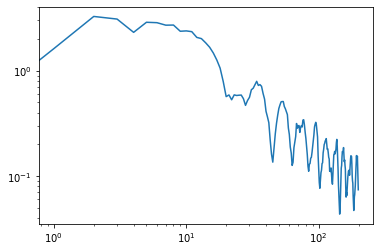

In [59]:
plt.plot(x)
plt.xscale('log')
plt.yscale('log')